**Banking Subscription Prediction & Target Marketing Analysis**

- Data EDA & Classification Prediction
- Data Source: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
- Identify high-potential customer segments for fixed deposits through predictive modeling
- Execute targeted marketing campaigns for these segments
- Compare subscription rates between target and control groups


In [2]:
import pandas as pd
df = pd.read_csv('banking.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


**Comparison of subscription rates based on customer profile conditions**  

In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
pd.DataFrame(df.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
# Average fixed deposit subscription rate
4640 / (36548+4640)

0.11265417111780131

### Categorical Variable Identification

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
df['age'].dtype

dtype('int64')

In [12]:
df['job'].dtype

dtype('O')

In [13]:
# ▶ numerical, categorical data 
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtype == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)

print("numerical_list :", numerical_list)
print("categorical_list :", categorical_list)

numerical_list : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_list : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [14]:
print(numerical_list)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [15]:
print(categorical_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Saving figure job_subscription_count


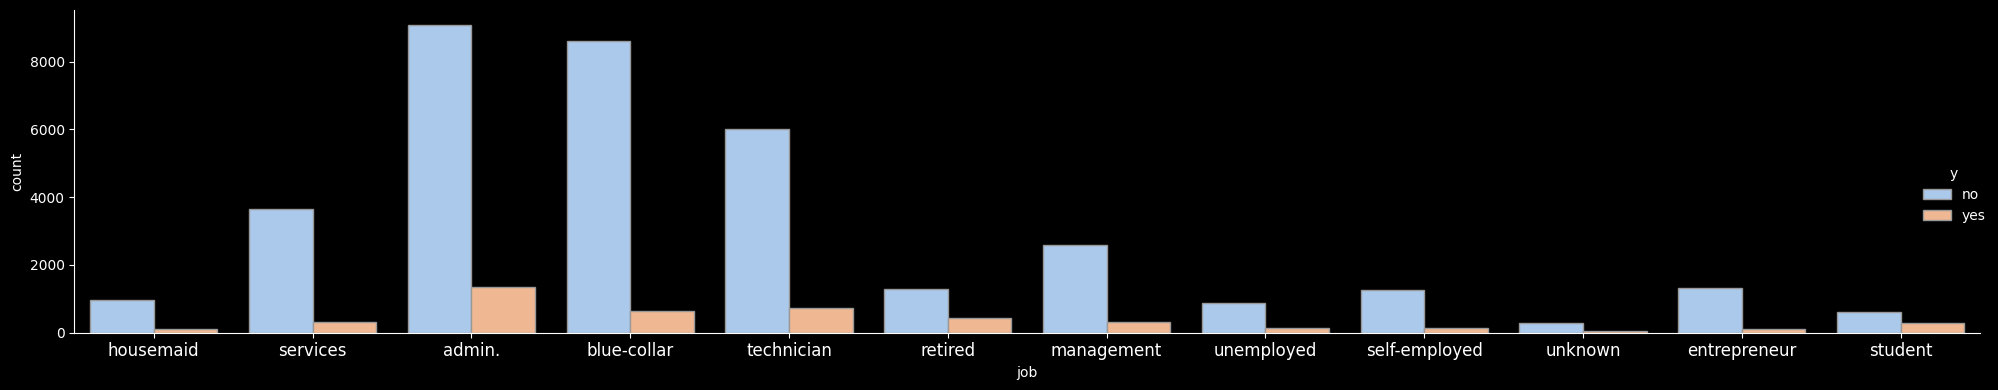

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df)
plt.gcf().set_size_inches(20, 4)
plt.xticks(fontsize=12)
save_fig("job_subscription_count")

([0, 1, 2],
 [Text(0, 0, 'nonexistent'), Text(1, 0, 'failure'), Text(2, 0, 'success')])

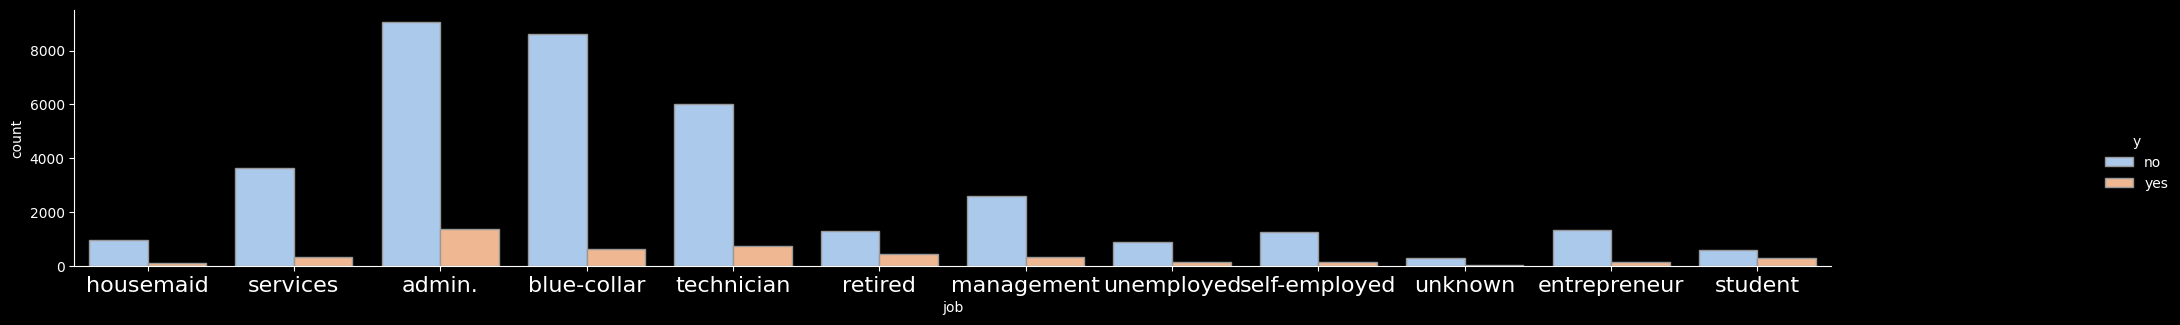

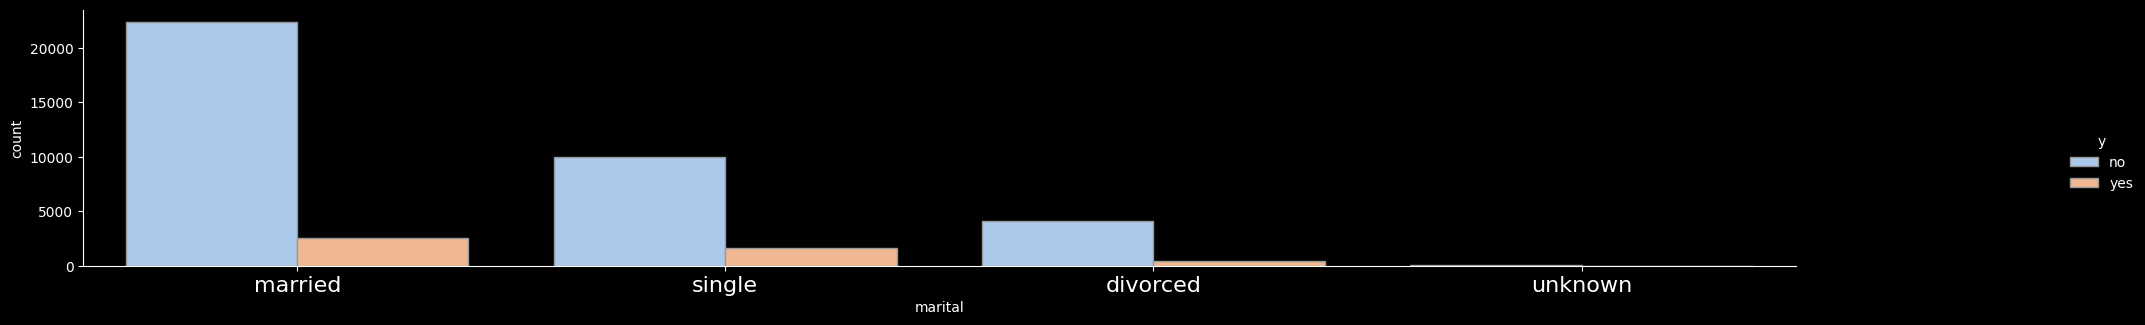

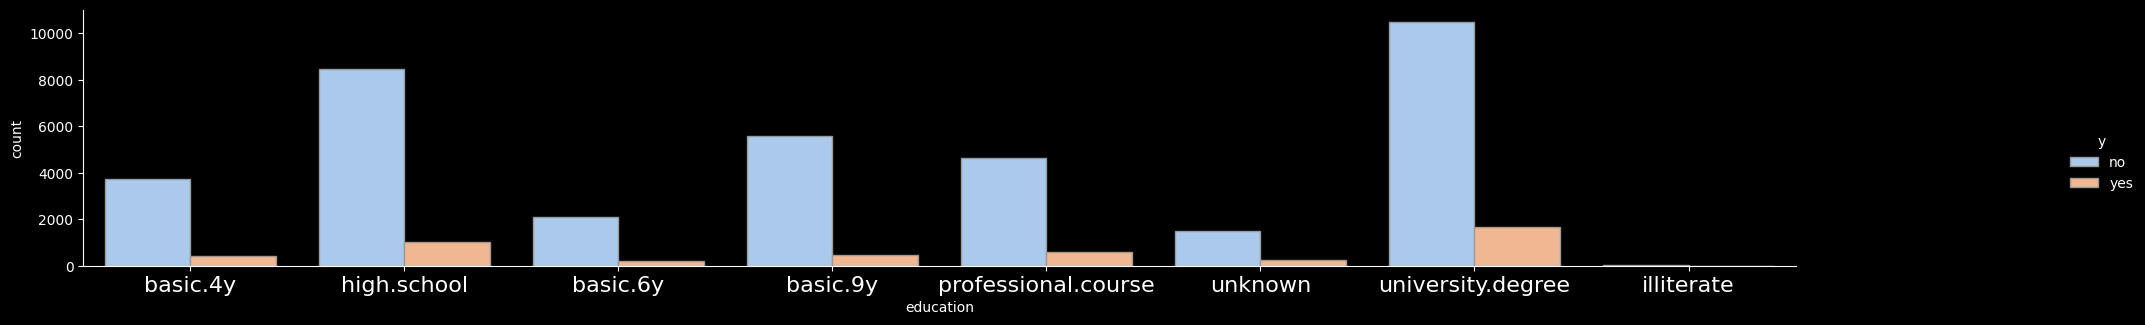

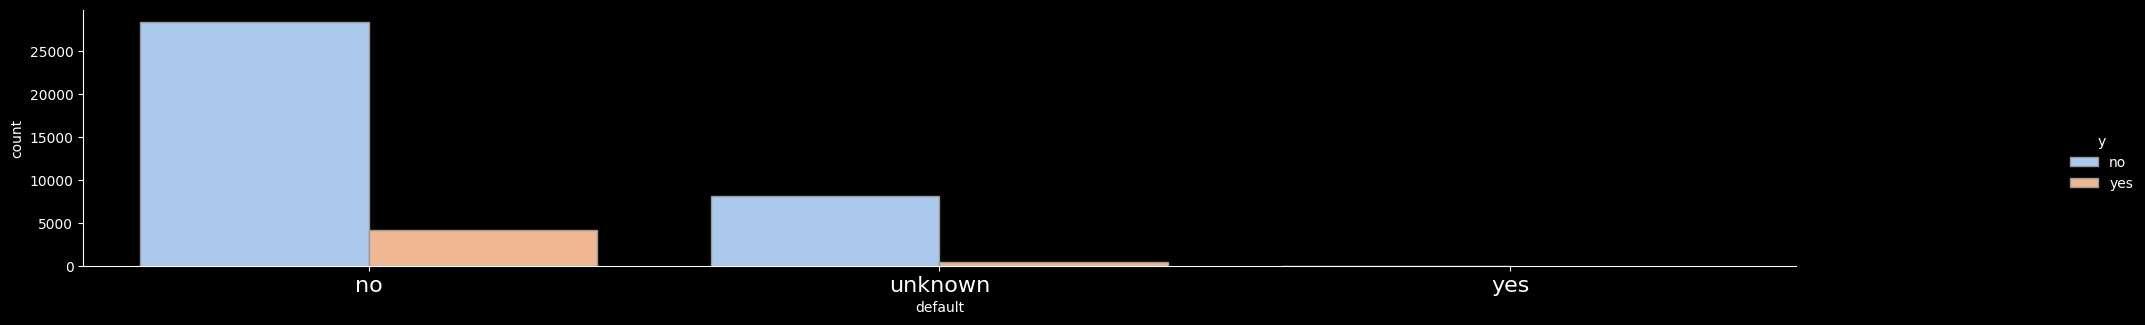

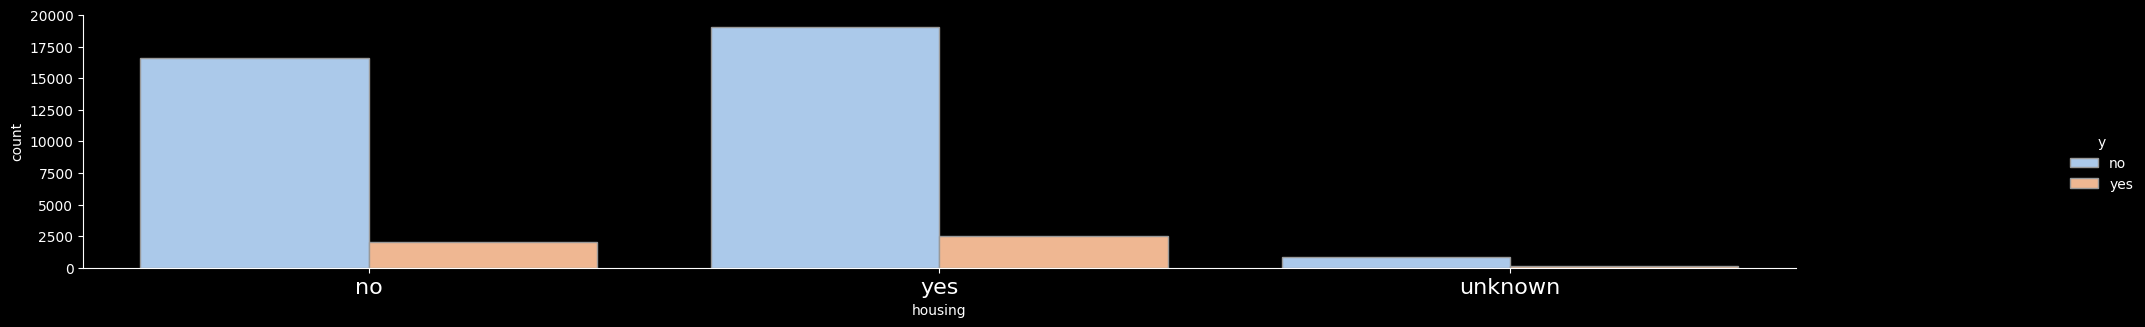

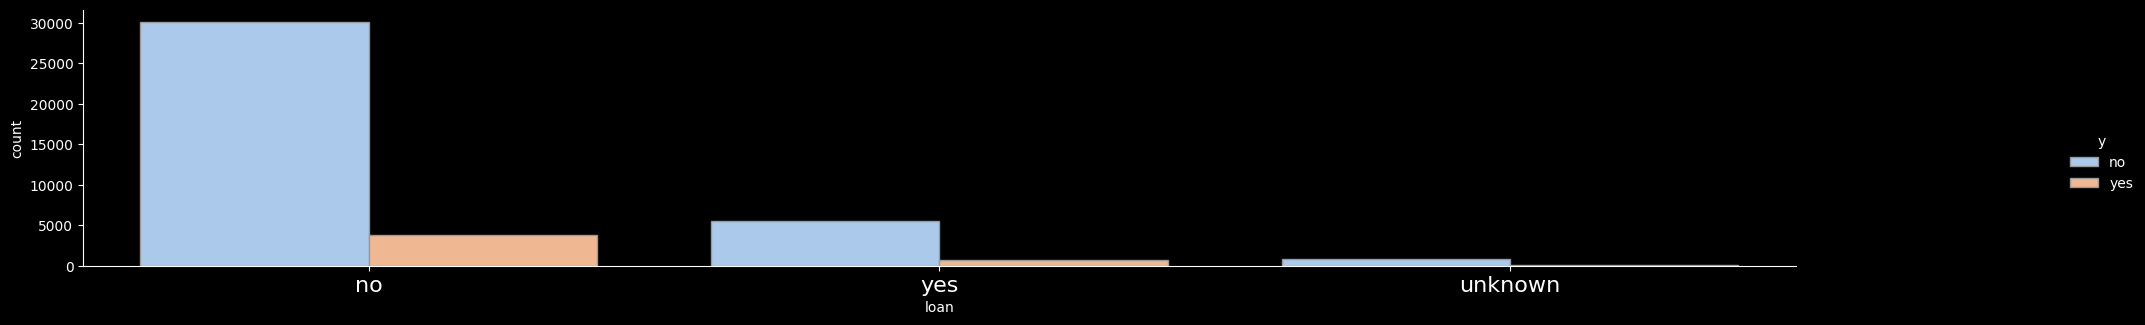

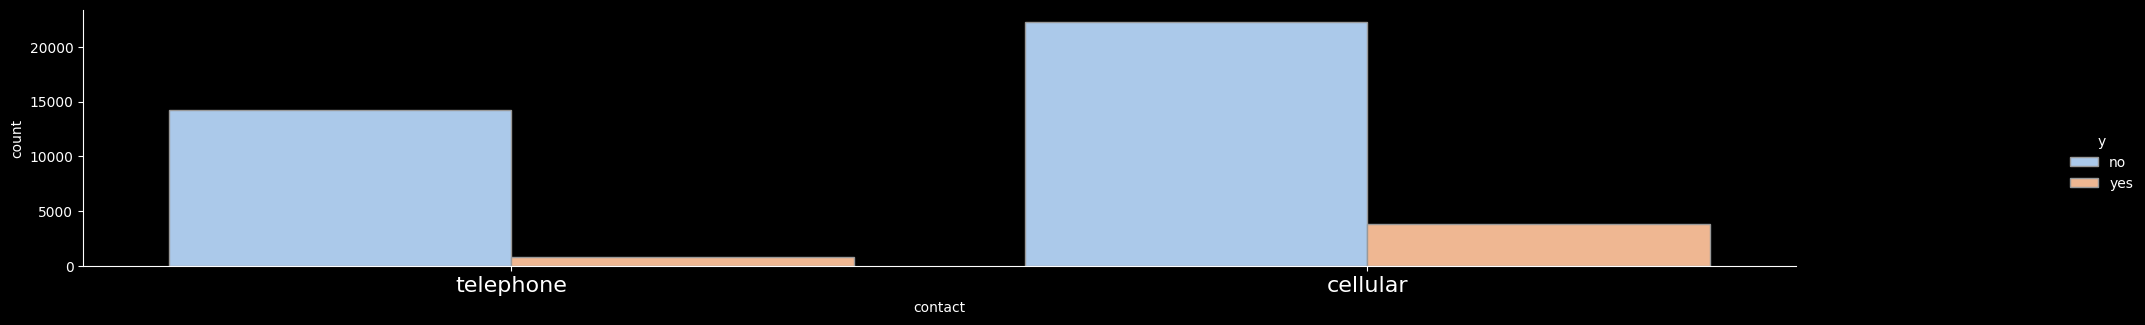

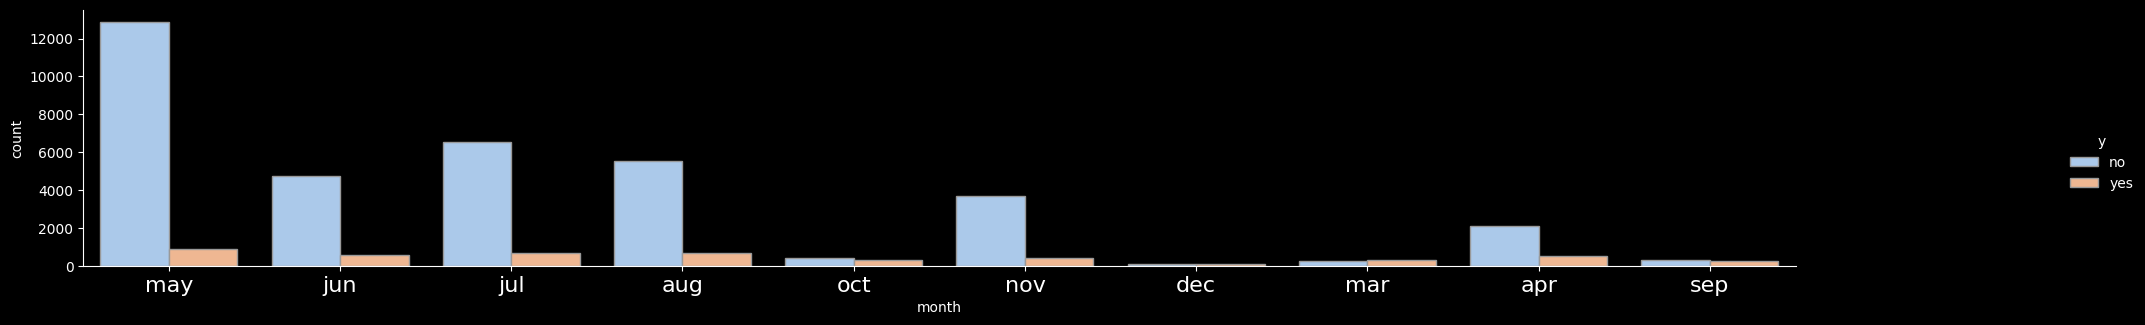

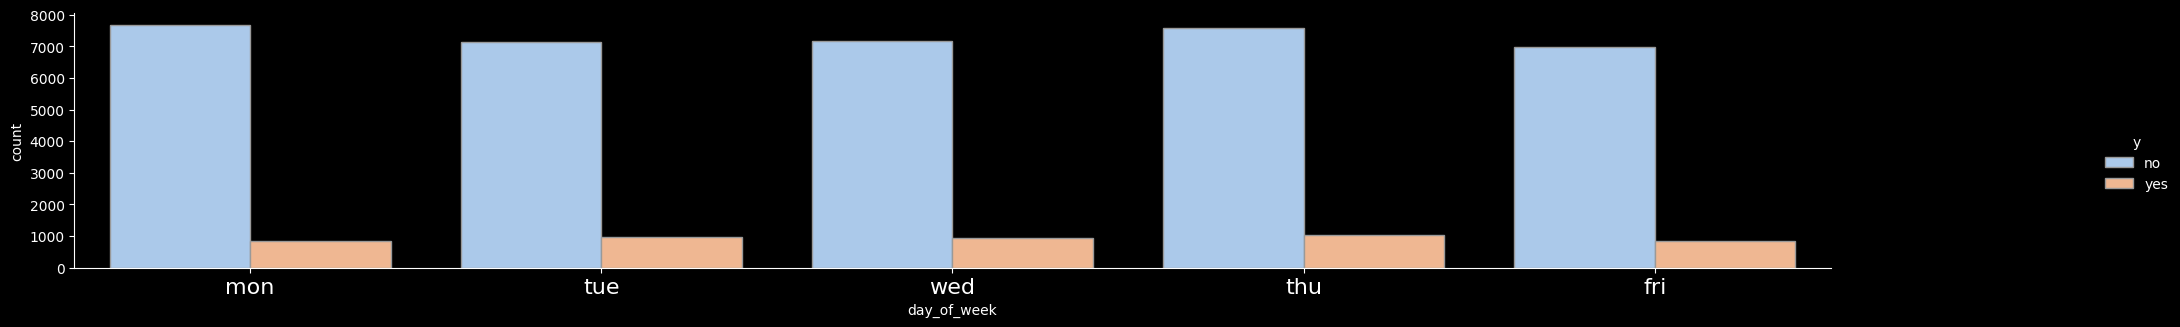

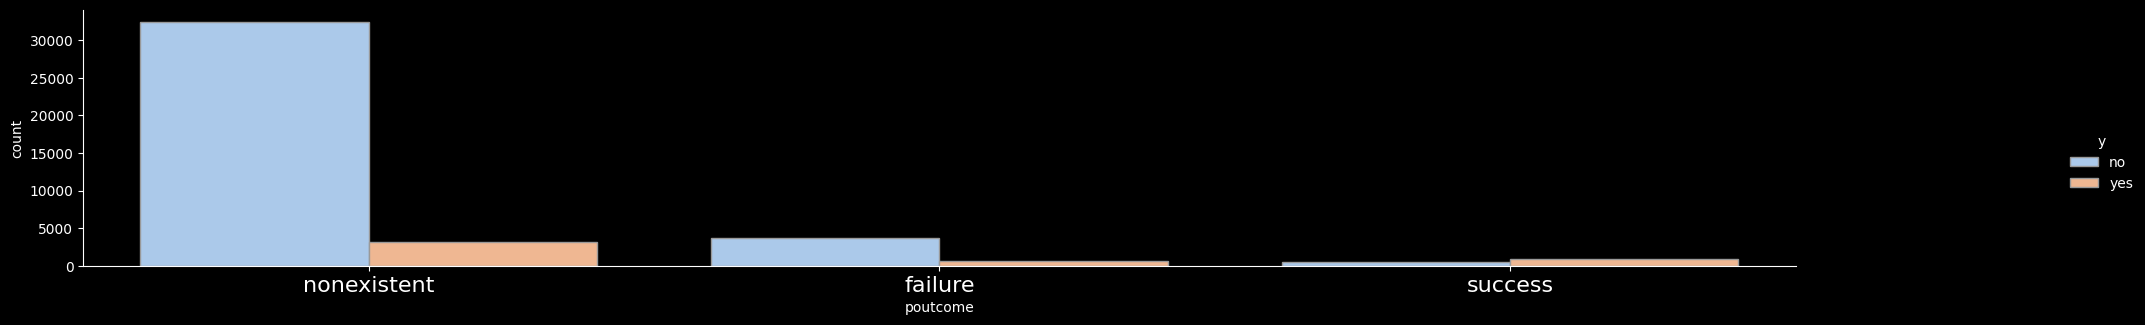

In [16]:
# Use catplots to take a quick look at composition of categorical variables and subscription status
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="marital", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="education", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="default", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="housing", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="loan", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="contact", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="month", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="day_of_week", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="poutcome", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)


**Rule-base product subscription prediction**  

### Customer profile - subscription rate comparison

In [17]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
import numpy as np
df['y'] = np.where(df['y']=='yes', 1, 0)
df_job = df.groupby('job')['y'].agg(['count', 'sum'])
df_job['ratio'] = round((df_job['sum'] / df_job['count'])*100, 2)
df_job.sort_values(by=['ratio'], ascending = False)

,count,sum,ratio
job,,,
student,875,275,31.43
retired,1720,434,25.23
unemployed,1014,144,14.20
admin.,10422,1352,12.97
management,2924,328,11.22
unknown,330,37,11.21
technician,6743,730,10.83
self-employed,1421,149,10.49
housemaid,1060,106,10.00


In [19]:
# per customer job
df_job=pd.DataFrame(df['y'].groupby(df['job']).value_counts())
df_job.columns=['cnt']
df_job=df_job.reset_index()
df_job.head(5)

,job,y,cnt
0,admin.,0,9070
1,admin.,1,1352
2,blue-collar,0,8616
3,blue-collar,1,638
4,entrepreneur,0,1332


In [20]:
df_job = pd.pivot_table(df_job,        
                     index = 'job',    
                     columns = 'y',    
                     values = 'cnt')  

df_job = df_job.reset_index()
df_job.head(5)

y,job,0,1
0,admin.,9070,1352
1,blue-collar,8616,638
2,entrepreneur,1332,124
3,housemaid,954,106
4,management,2596,328


In [21]:
# sign_ratio
df_job = df_job.rename(columns={0: 'no', 1: 'yes'})
df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)
df_job.sort_values(by=['sign_ratio'], ascending =False)

y,job,no,yes,sign_ratio
8,student,600,275,31.4
5,retired,1286,434,25.2
10,unemployed,870,144,14.2
0,admin.,9070,1352,13.0
4,management,2596,328,11.2
11,unknown,293,37,11.2
9,technician,6013,730,10.8
6,self-employed,1272,149,10.5
3,housemaid,954,106,10.0
2,entrepreneur,1332,124,8.5


Saving figure job_subscription_rate


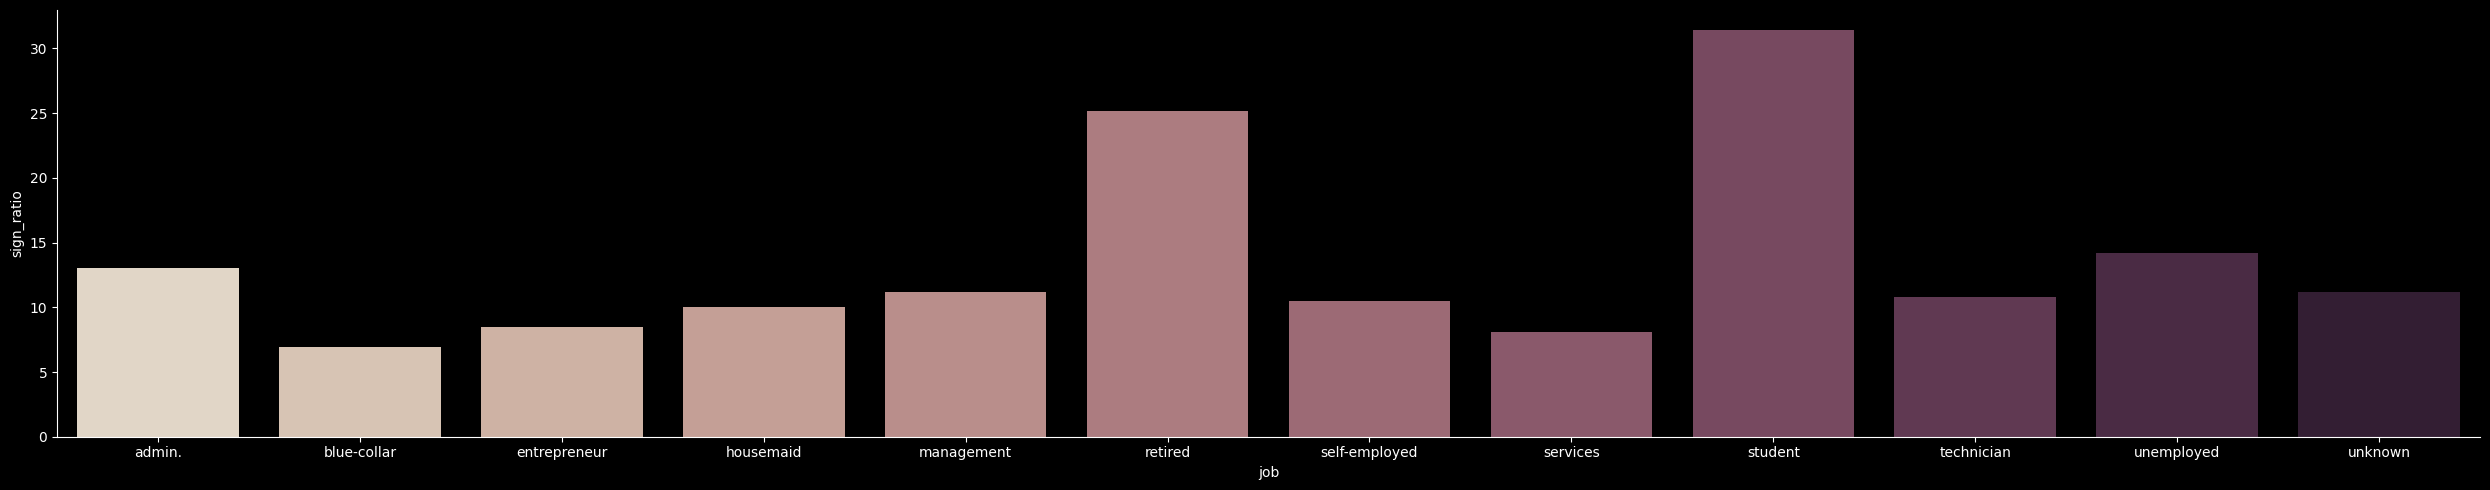

In [22]:
# Student has the highest subscription rate, followed by retired customers (11% average subscription rate)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", y="sign_ratio", kind='bar', palette="ch:.25", data=df_job);
plt.rc('xtick', labelsize=10)
plt.gcf().set_size_inches(25, 5)
save_fig("job_subscription_rate")

In [23]:
i = 'poutcome'
df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

df_gp = pd.pivot_table(df_gp,              
                        index = i,         
                        columns = 'y',  
                        values = 'cnt')

df_gp = df_gp.reset_index()

df_gp = df_gp.rename(columns={0: 'no', 1: 'yes'})

df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,poutcome,no,yes,sign_ratio
2,success,479,894,65.1
0,failure,3647,605,14.2
1,nonexistent,32422,3141,8.8


In [24]:
categorical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [25]:
categorical_list.remove('y')

In [26]:
df_job.columns

Index(['job', 'no', 'yes', 'sign_ratio'], dtype='object', name='y')

In [27]:
# comparative analysis under all categorical variables
# Return highest subscription rate for each feature

for i in categorical_list :
  df_job=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
  df_job.columns=['cnt']
  df_job=df_job.reset_index()

  df_job = pd.pivot_table(df_job,
                      index = i,
                      columns = 'y',
                      values = 'cnt')
  df_job = df_job.reset_index().rename(columns={0: 'no', 1: 'yes'})

  df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)

  df_job=df_job.sort_values(by=['sign_ratio'], ascending=False)

  print(df_job.iloc[0:1,:])
  print('')

y      job   no  yes  sign_ratio
8  student  600  275        31.4

y  marital  no  yes  sign_ratio
3  unknown  68   12        15.0

y   education  no  yes  sign_ratio
4  illiterate  14    4        22.2

y default       no     yes  sign_ratio
0      no  28391.0  4197.0        12.9

y housing     no   yes  sign_ratio
2     yes  19069  2507        11.6

y loan     no   yes  sign_ratio
0   no  30100  3850        11.3

y   contact     no   yes  sign_ratio
0  cellular  22291  3853        14.7

y month   no  yes  sign_ratio
5   mar  270  276        50.5

y day_of_week    no   yes  sign_ratio
2         thu  7578  1045        12.1

y poutcome   no  yes  sign_ratio
2  success  479  894        65.1



### Rule base subscription rate

In [28]:
df_rule = df[ (df['job'] == 'student') |
# (df['marital'] == 'unknown') |
# (df['education'] == 'illiterate') |
# (df['default'] == 'no') |
# (df['housing'] == 'yes') |
# (df['loan'] == 'no') |
(df['contact'] == 'cellular') |
(df['month'] == 'mar') |
(df['day_of_week'] == 'thu') |
(df['poutcome'] == 'success') ]

In [29]:
df_rule['y'].value_counts()

y
0    25143
1     4091
Name: count, dtype: int64

In [30]:
4091 / (4091 + 25143)

0.1399397961277964

**Product subscription prediction using machine learning**  

In [31]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [32]:
df['y'].unique()

array([0, 1])

In [33]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['duration','y'], axis=1)
Y=df['y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(28831, 19)
(28831,)
(12357, 19)
(12357,)


In [35]:
print(categorical_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [36]:
for i in categorical_list :
  print(i, df[i].nunique())

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3


In [37]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

x_train[categorical_list].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
24507,6,1,6,0,2,0,0,7,1,1
11959,6,1,5,0,2,0,1,4,3,1
41001,0,0,2,0,0,0,0,8,4,0
3458,2,1,0,0,1,1,1,6,2,1
1307,1,1,0,1,0,0,1,6,2,1


In [38]:
x_train[categorical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
24507,6,1,6,0,2,0,0,7,1,1
11959,6,1,5,0,2,0,1,4,3,1
41001,0,0,2,0,0,0,0,8,4,0
3458,2,1,0,0,1,1,1,6,2,1
1307,1,1,0,1,0,0,1,6,2,1
...,...,...,...,...,...,...,...,...,...,...
37475,0,1,6,1,2,0,0,1,2,1
14023,10,1,2,0,0,0,0,3,0,1
16035,0,2,6,0,2,0,0,3,3,1
25620,1,1,1,0,0,0,0,7,4,1


In [39]:
x_test[categorical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
732,0,2,3,0,2,2,1,6,3,1
33551,0,1,2,1,0,0,0,6,3,0
28547,0,1,6,0,0,2,0,0,4,0
8544,0,1,3,0,2,2,1,4,4,1
34361,7,1,3,0,2,0,0,6,2,0
...,...,...,...,...,...,...,...,...,...,...
36028,9,2,6,0,0,0,0,6,3,2
41049,8,2,3,0,0,0,0,8,3,1
23083,6,1,6,0,2,0,0,1,3,1
28519,5,0,6,0,2,0,0,0,3,1


### Model Training & Testing

In [40]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       0.99      0.97      0.98      3248

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.56      0.29      0.38      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.89      0.88     12357



In [41]:
pd.Series(y_pred_train).value_counts()

0    25660
1     3171
Name: count, dtype: int64

### Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400],
           'max_depth' : [6, 8, 10]
            }

rf_clf = RandomForestClassifier(random_state = 12345, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(x_train, y_train)

print('Optimal Hyperparameters: ', grid_cv.best_params_)
print('Highest Prediction Accuracy: {:.4f}'.format(grid_cv.best_score_))

Optimal Hyperparameters:  {'max_depth': 6, 'n_estimators': 400}
Highest Prediction Accuracy: 0.6812


In [43]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25583
           1       0.74      0.21      0.33      3248

    accuracy                           0.90     28831
   macro avg       0.82      0.60      0.64     28831
weighted avg       0.89      0.90      0.88     28831

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.70      0.19      0.30      1392

    accuracy                           0.90     12357
   macro avg       0.80      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [44]:
pd.Series(y_pred_test).value_counts()

0    11982
1      375
Name: count, dtype: int64

### Feature IMP Analysis

Saving figure feature_importance


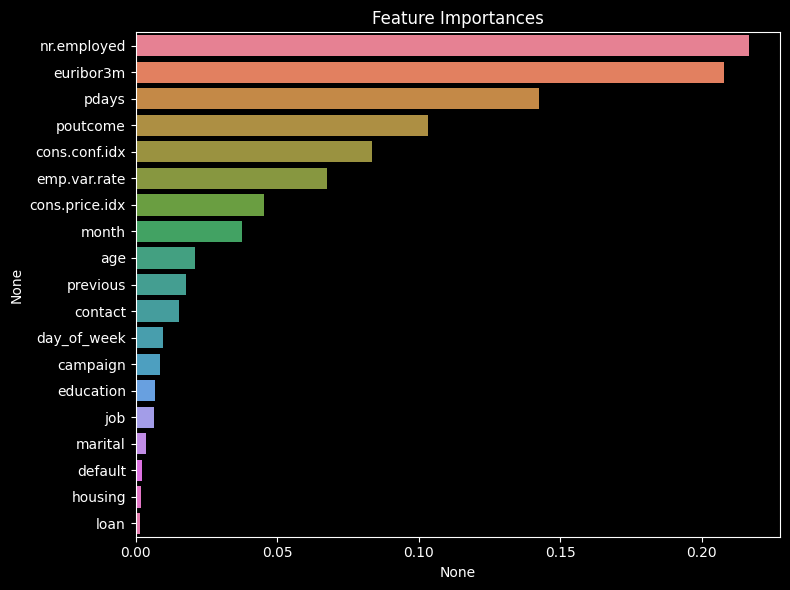

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(
    x=ftr_top20,
    y=ftr_top20.index,
    palette=sns.color_palette("husl", len(ftr_top20))
)
save_fig("feature_importance")
plt.show()

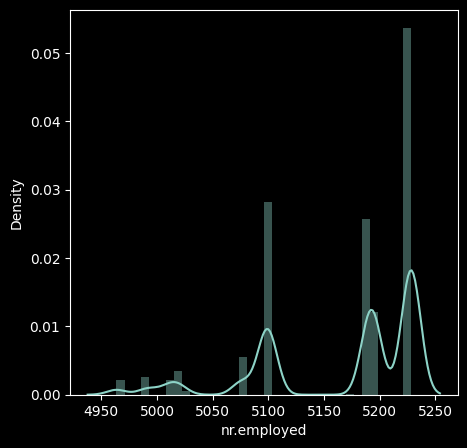

In [46]:
sns.distplot(df['nr.employed']);
plt.gcf().set_size_inches(5 ,5)

In [47]:
import numpy as np
df['nr.employed_gp'] = np.where (df['nr.employed'] <= 5000, 'below 5000',
                           np.where(df['nr.employed'] <= 5200, '5000~5200', 'over 5200'))

df_gp = df.groupby('nr.employed_gp')['y'].agg(['count', 'sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
nr.employed_gp,,,
5000~5200,23546,3070,13.0
below 5000,1408,704,50.0
over 5200,16234,866,5.3


### Save and Read Model

In [48]:
import pickle
saved_model = pickle.dumps(rfc)

clf_from_pickle = pickle.loads(saved_model)